In [31]:
# cette cellule monte le disque google drive
# il faut Copier coller le code demandé dans le lien

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Affichage thumbnails carre

In [32]:
# Import des librairies
import numpy as np
import pandas as pd
import os
from skimage import io
pd.set_option("max_colwidth", 4000) 
import seaborn as sns
import matplotlib.pylab as plt
import cv2
import time

#Dataviz partie 1 

##Le DataSet contient 87864 images

In [33]:
#@title
# Lire le fichier csv
link = '/content/drive/MyDrive/Projet_Plante/Metadata_Keras.csv'
    
df = pd.read_csv(link, index_col = 0) 
df.head()

,train/valid,Directory,type de plante,maladie,healthy,class,pre_process
0,train,/content/drive/MyDrive/Projet_Plante/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/8d2bd2f9-2c65-43f7-95f7-22f7f404ba13___FREC_Scab 3232_new30degFlipLR.JPG,Apple,Apple_scab,0,0,True
1,train,/content/drive/MyDrive/Projet_Plante/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/a2d623ff-8e4d-40e3-a6c5-3d61e7355f92___FREC_Scab 2949_270deg.JPG,Apple,Apple_scab,0,0,True
2,train,/content/drive/MyDrive/Projet_Plante/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/975c76b5-0c9f-4179-bc48-20b37d3113e6___FREC_Scab 3463_90deg.JPG,Apple,Apple_scab,0,0,True
3,train,/content/drive/MyDrive/Projet_Plante/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/9efcd800-e927-4595-8eb8-26d36524242a___FREC_Scab 3026.JPG,Apple,Apple_scab,0,0,False
4,train,/content/drive/MyDrive/Projet_Plante/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/9eab7829-c658-4544-b6ba-f7fb10035aab___FREC_Scab 3382_270deg.JPG,Apple,Apple_scab,0,0,True


In [7]:
df.shape

(84852, 7)

##Toutes les photos sont au format JPG et font 256*256 pixels 



##On remarque que les feuilles sont placées sur un fond noir et que la plupart ont des doublons en miroir, il n'y a en réalité que 40000 images originales

In [8]:
liste_images = []
title = []
liste_class = list(df['class'].unique())
for i in range(0,38) :
  df = pd.read_csv(link, index_col = 0) 
  df = df[df['class']== i]
  # df.head()
  liste_images.append(df.iloc[0,1])
  title.append(i)
  liste_images.append(df.iloc[1,1])
  title.append(i)
  liste_images.append(df.iloc[2,1])
  title.append(i)
  liste_images.append(df.iloc[3,1])
  title.append(i)

In [10]:
#images 
plt.figure();

fig, ax = plt.subplots(13, 12, subplot_kw=dict(xticks=[], yticks=[]),figsize=(20,25));

for i, axi in enumerate(ax.flat):
    axi.set_title('classe '+ str(title[i])) 
    img = plt.imread(liste_images[i])
    axi.imshow(img);

Output hidden; open in https://colab.research.google.com to view.

In [34]:
df.groupby(by='pre_process').count()

,train/valid,Directory,type de plante,maladie,healthy,class
pre_process,,,,,,
False,44406,44406,44406,44406,44406,44406
True,43492,43492,43492,43492,43492,43492


##Il y a 14 types de plante représentés 

il y a  14  types de plante differents


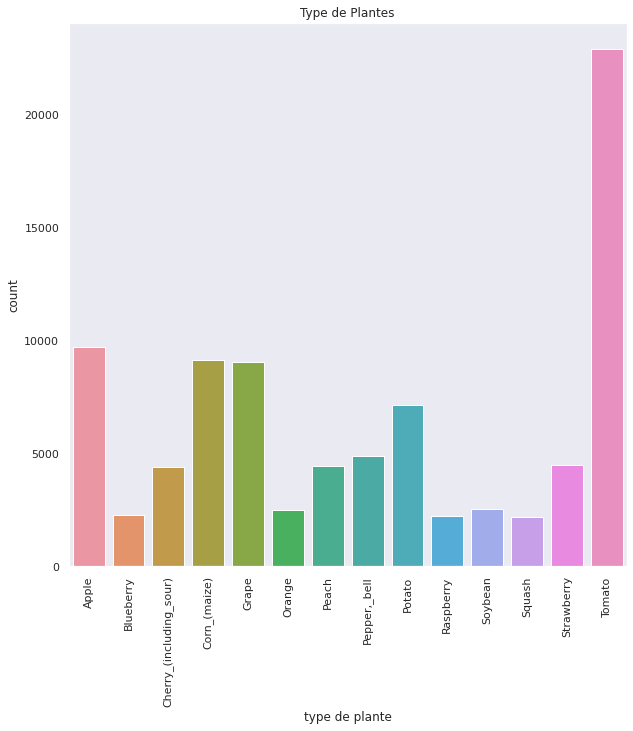

In [38]:

sns.set(rc={'figure.figsize':(10,10)}, palette='colorblind',style = 'dark')

print('il y a ', len(df['type de plante'].unique()),' types de plante differents')
# print(df['type de plante'].value_counts())
# print(df['type de plante'].value_counts(normalize = True)*100)

plt.xticks(rotation=90)
plt.title("Type de Plantes")
sns.countplot(x = df['type de plante']);

##On remarque également que la répartition entre les images de plantes malades et non malades n'est pas équilibrée   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


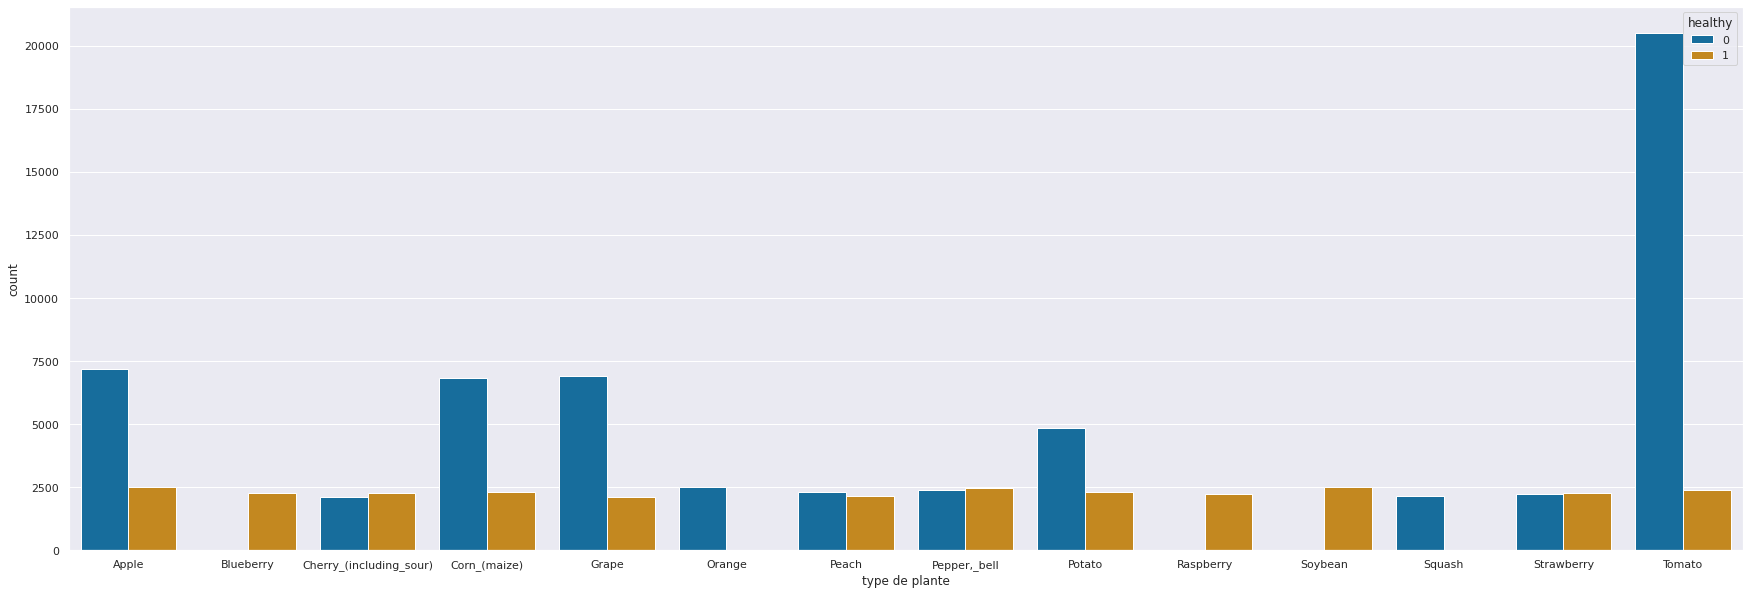

In [39]:
sns.set(rc={'figure.figsize':(30,10)}, palette = 'colorblind')

sns.countplot(df['type de plante'], hue= df['healthy'])

##Il y a 20 maladies différentes, certaines maladies atteignent plusieurs types de plante, c'est le cas par exemple de 'bacterial spot', healthy signifie en bonne santé 

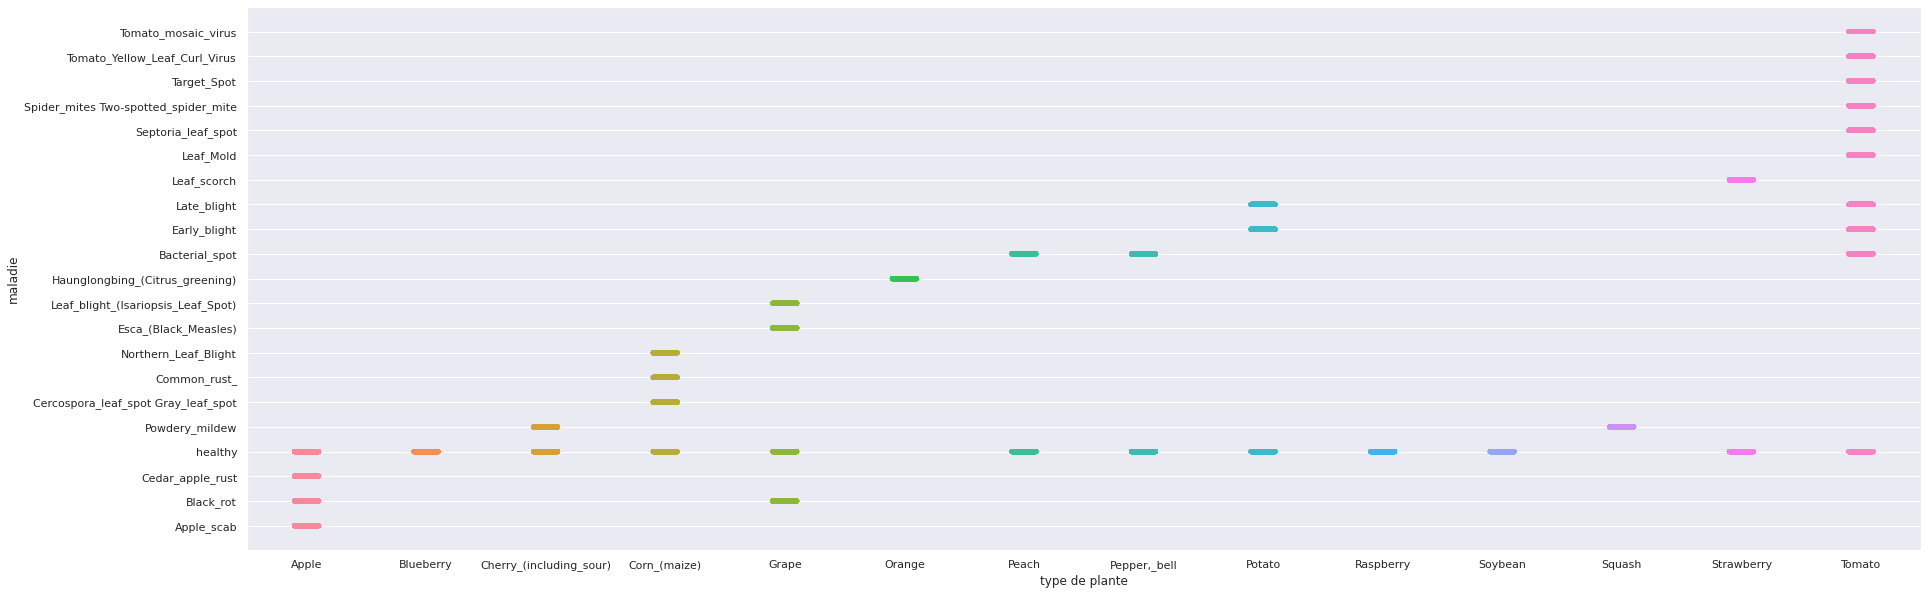

In [40]:
sns.set(rc={'figure.figsize':(30,10)}, palette = 'colorblind')

sns.stripplot(x= df['type de plante'],y = df['maladie']);


##Le Dataset est déja séparé en un ensemble d'entrainement et un ensemble de test

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


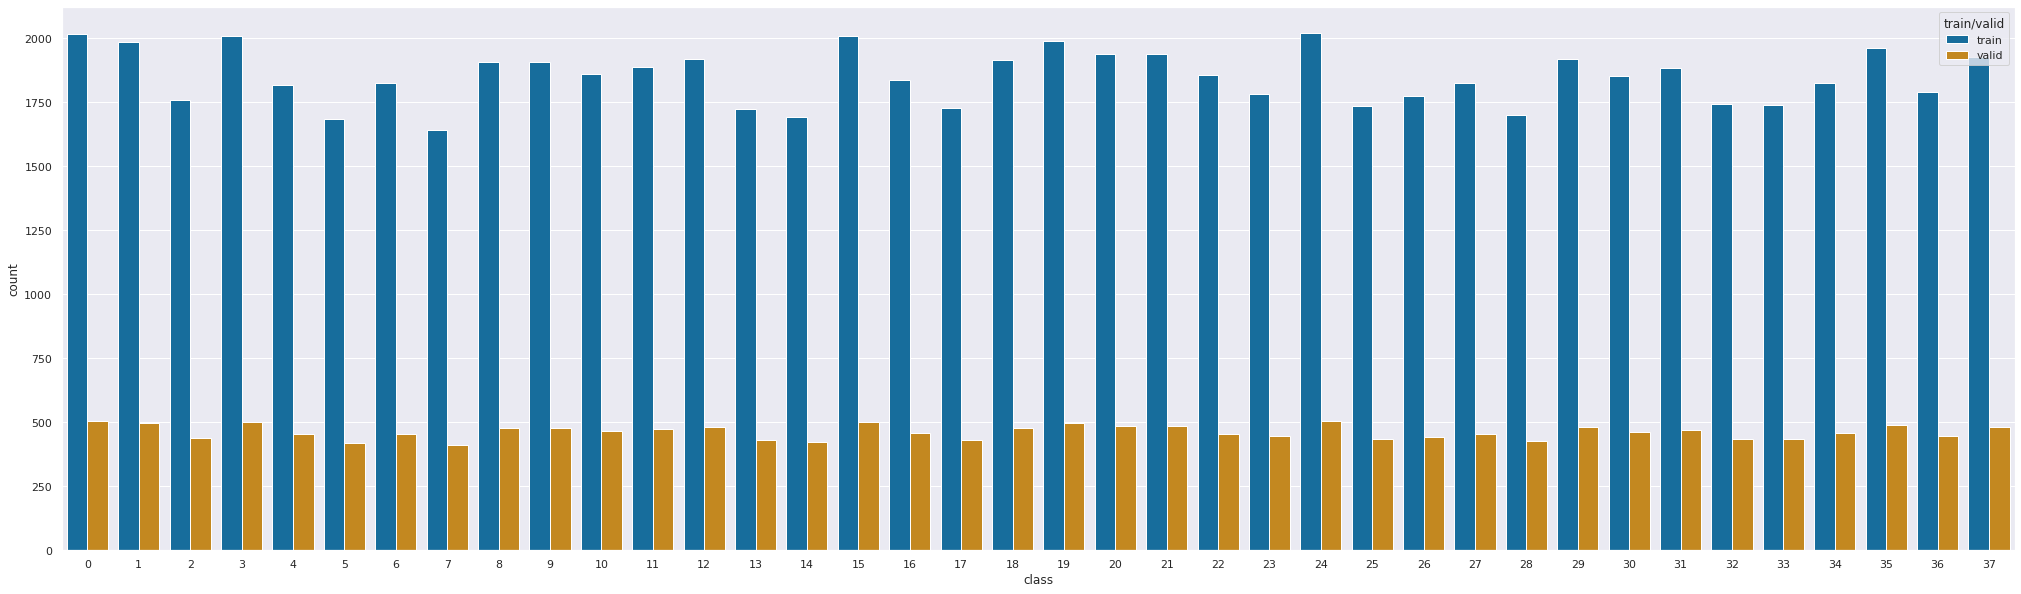

In [41]:
sns.set(rc={'figure.figsize':(35,10)},palette='colorblind')
sns.countplot(df['class'],hue=df['train/valid']);